In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from matplotlib import cm

## **Definición de Constantes**

In [ ]:
# Definición de constantes
MT=5.98e24 #Masa de la tierra en kg
ML=7.34e22 #Masa de la luna en kg
RT=6.37e6 #Radio de la tierra en m
RL=1.74e6 #Radio de la luna en m
DTL=284.4e6 #Distancia entre la tierra y la luna en m
rT=4.656e6 #Distancia entre la tierra y el centro de masa en m
rL=379.344e6 #Distancia entre la luna y el centro de masa en m
w=2.67e-6 #Velocidad angular del sistema tierra-luna en rad/s
G=6.6743 #Constante gravitacional

## **Sistema de Coordenadas**

[[0.5 0.5]]


(-1.5, 1.3, -1.5, 1.3)

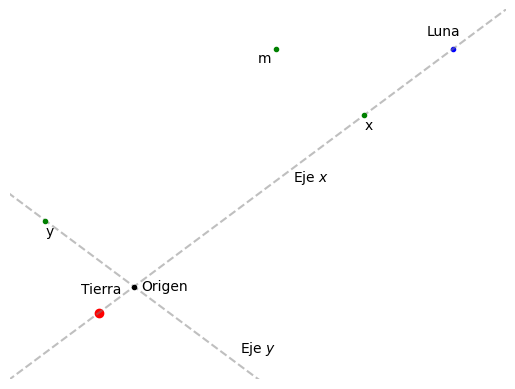

In [ ]:
plt.xlim(-1.5, 1.3)
plt.ylim(-1.5, 1.3)

plt.plot([-1],[-1], "ro")
plt.annotate("Tierra", (-1.1, -0.85))
plt.plot([1],[1], "b.")
plt.annotate("Luna", (0.85, 1.1))

plt.plot([-10, 10], [-10, 10], "--", color="grey", alpha=0.5)
plt.annotate("Eje $x$", (0.1, 0))
plt.plot([-10, 10], [8.4, -11.6], "--", color="grey", alpha=0.5)
plt.annotate("Eje $y$", (-0.2, -1.3))

plt.plot([-0.8], [-0.8], ".", color="black")
plt.annotate("Origen", (-0.76, -0.83))

plt.plot([0], [1], "g.")
plt.annotate("m", (-0.1, 0.9))

A1=np.matrix([[1/2, 1/2], [1/2,1/2]]) #Matriz de proyección sobre el eje x
P=np.array([0,1])

p1=A1@P
print(p1)
plt.plot([p1[0,0]], [p1[0,1]], "g.")
plt.annotate("x", (p1[0,0], p1[0,1]-0.11))

A2=np.matrix([[-1/2, 1/2],[1/2,-1/2]]) #Matrix de proyección sobre el eje y (moviendo el sist. de coordenadas)
p2=-A2@(P-np.array([-0.8, -0.8]))+np.array([-0.8,-0.8])
p2
plt.plot([p2[0,0]], [p2[0,1]], "g.")
plt.annotate("y", (p2[0,0], p2[0,1]-0.11))
plt.axis("off")


## **Energia Potencial**

In [ ]:
#Energía potencial

dT=lambda x,y: np.sqrt((x-rT)**2+y**2) # Distancia de (x,y) a la tierra, con el origen en el centro de masa y el eje x a lo largo de la línea tierra-luna
dL=lambda x,y: np.sqrt((x-rL)**2+y**2) # Distancia de (x,y) a la luna, con el origen en el centro de masa y el eje x a lo largo de la línea tierra-luna

V = lambda x,y,m:-G*(MT*m)/dT(x, y)-G*(MT*m)/dL(x, y)-1/2*m*w**2*(x**2+y**2) #Energía potencial de un cuerpo de masa m en posición x, y
X=np.linspace(-2*rL, 2*rL, 10000)
Y=np.linspace(-2*rL, 2*rL, 10000)

X, Y = np.meshgrid(X, Y)
Z = V(X, Y, 1)

<Figure size 6400x4800 with 0 Axes>

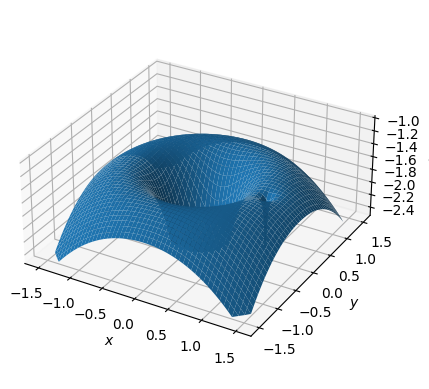

<Figure size 6400x4800 with 0 Axes>

In [ ]:
#Expresando energía potencial en unidades de distancia entre la luna y la tierra (d=rT+rL)
a=rT/(rT+rL)
V = lambda x,y: -(1-a)/np.sqrt((x+a)**2+y**2)-a/(np.sqrt((x-1+a)**2+y**2))-1/2*(x**2+y**2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X=np.linspace(-1.5, 1.5, 1000)
Y=np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(X, Y)
Z = V(X, Y)
Z[Z<-2.5]=np.nan
ax.set_zlim3d(-2.5, -1)

ax.plot_surface(X, Y, Z, alpha=1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$U$")

ax.set_aspect("equal")
plt.figure(figsize=(12.8,9.6), dpi=500.0, facecolor=None, edgecolor=None, frameon=True)

## $L_4$ y $L_5$

In [ ]:
def ecuaciones(variables):
    x, y = variables
    f1 = (1-a)*((x+a)/((x+a)**2 + y**2)**(3/2)) + a*(x-1+a)/((x-1+a)**2 + y**2)**(3/2) - x
    f2 = (1-a)*(y/((x+a)**2 + y**2)**(3/2)) + a*(y/((x-1+a)**2 + y**2)**(3/2)) - y
    return [f1, f2]

In [ ]:
initial_guess = [0.8, 0.8]

solution = root(ecuaciones, initial_guess)
solution

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.654e-14  1.610e-14]
       x: [ 4.879e-01  8.660e-01]
  method: hybr
    nfev: 27
    fjac: [[-7.142e-01 -7.000e-01]
           [ 7.000e-01 -7.142e-01]]
       r: [ 1.431e+00  2.494e+00  5.651e-02]
     qtf: [ 5.621e-13 -2.315e-11]

In [ ]:
initial_guess = [0.8, -0.8]

solution = root(ecuaciones, initial_guess)
solution

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.665e-14 -1.610e-14]
       x: [ 4.879e-01 -8.660e-01]
  method: hybr
    nfev: 27
    fjac: [[-7.142e-01  7.000e-01]
           [-7.000e-01 -7.142e-01]]
       r: [ 1.431e+00 -2.494e+00  5.651e-02]
     qtf: [ 5.618e-13  2.315e-11]

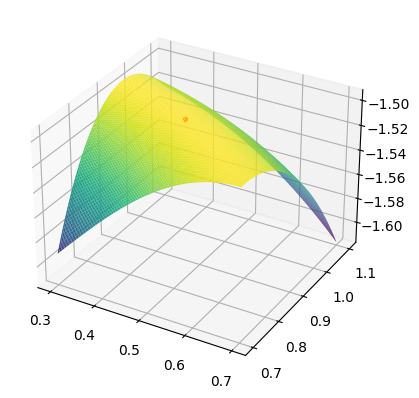

In [ ]:
#la energía potencial en las proximidades de unos de los dos puntos
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


X=np.linspace(0.3, 0.7, 100)
Y=np.linspace(0.7, 1.1, 100)
X, Y = np.meshgrid(X, Y)
Z = V(X, Y)
#Z[Z<-2.5]=np.nan
#ax.set_zlim3d(-1.62,-1.48)

#ax.plot_surface(X, Y, Z, cmap=cm.viridis)

ax.plot(1/2-a, np.sqrt(3)/2, V(1/2-a, np.sqrt(3)/2), "r.")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#fig.colorbar(surf, shrink=0.5, aspect=5)
#ax.set_aspect("equal")

## $L_1$, $L_2$ y $L_3$

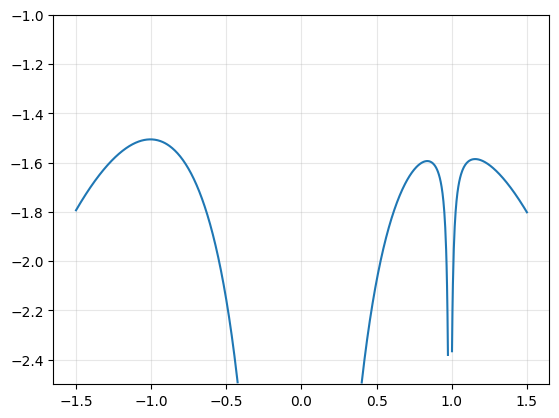

In [ ]:
#Energía potencial V(X, 0)
#Puntos L1, L2, L3
import matplotlib.pyplot as plt

ax = plt.axes()

X=np.linspace(-1.5, 1.5, 1000)
Y=V(X, 0)
Y[Y<-2.5]=np.nan

plt.plot(X, Y)
ax.set_ylim([-2.5, -1])
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Programando las derivadas parciales

dVx= lambda x, y: (1-a)*((x+a)/((x+a)**2+y**2)**(3/2))+a*(x-1+a)/((x-1+a)**2+y**2)**(3/2)-x
dVy= lambda x, y: (1-a)*(y/((x+a)**2+y**2))+a*(y)/((x-1+a)**2+y**2)-y

**L1**

In [ ]:
root(lambda x: dVx(x, 0), [8])

 message: The solution converged.
 success: True
  status: 1
     fun: [-2.220e-16]
       x: [ 8.370e-01]
    nfev: 24
    fjac: [[-1.000e+00]]
       r: [ 1.129e+01]
     qtf: [-3.567e-12]

**L2**

In [ ]:
root(lambda x: dVx(x, 0), [10])

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.497e-12]
       x: [ 1.156e+00]
    nfev: 25
    fjac: [[-1.000e+00]]
       r: [ 7.382e+00]
     qtf: [ 5.326e-08]

**L3**

In [ ]:
root(lambda x: dVx(x, 0), [-3])

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-1.005e+00]
    nfev: 14
    fjac: [[-1.000e+00]]
       r: [ 3.021e+00]
     qtf: [-5.240e-13]

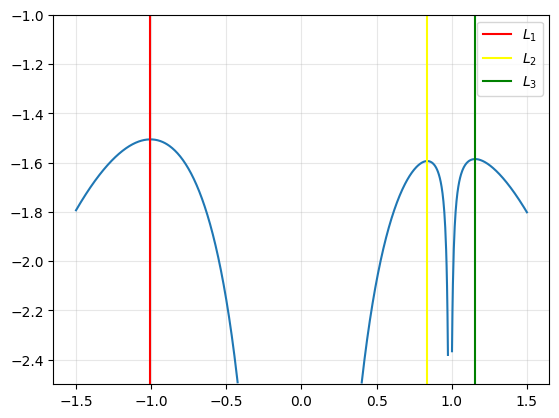

In [ ]:
#Graficando los puntos L1, L2, L3

ax = plt.axes()

X=np.linspace(-1.5, 1.5, 1000)
Y=V(X, 0)
Y[Y<-2.5]=np.nan

plt.plot(X, Y)
ax.set_ylim([-2.5, -1])
plt.grid(alpha=0.3)
plt.axvline(x=-1.005, color="red", label = "$L_1$")
plt.axvline(x=0.837, color="yellow",  label = "$L_2$")
plt.axvline(x=1.156, color="green", label = "$L_3$")
plt.legend()
plt.show()


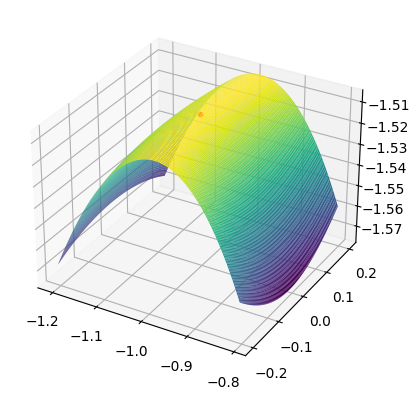

In [ ]:
# Graficando energía potencial gravitacional cerca de los puntos L3

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


X=np.linspace(-1.005-0.2, -1.005+0.2, 100)
Y=np.linspace(-0.2, 0.2, 100)
X, Y = np.meshgrid(X, Y)
Z = V(X, Y)
Z[Z<-2]=np.nan


ax.plot(-1.005, 0, V(-1.005, 0), "r.")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

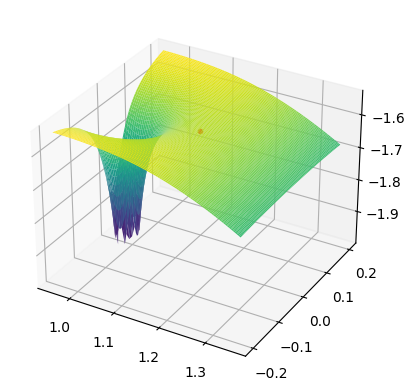

In [ ]:
# Graficando energía potencial gravitacional cerca de los puntos L2

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


X=np.linspace(1.156-0.2, 1.156+0.2, 100)
Y=np.linspace(-0.2, 0.2, 100)
X, Y = np.meshgrid(X, Y)
Z = V(X, Y)
Z[Z<-2]=np.nan


ax.plot(1.156, 0, V(1.156, 0), "r.")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

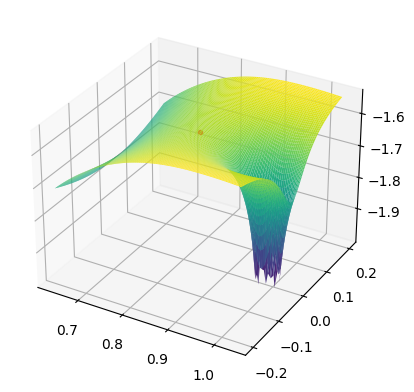

In [ ]:
# Graficando energía potencial gravitacional cerca del punto L1

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


X=np.linspace(0.837-0.2, 0.837+0.2, 100)
Y=np.linspace(-0.2, 0.2, 100)
X, Y = np.meshgrid(X, Y)
Z = V(X, Y)
Z[Z<-2]=np.nan


ax.plot(0.837, 0, V(0.837, 0), "r.")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')